<AxesSubplot:xlabel='index'>

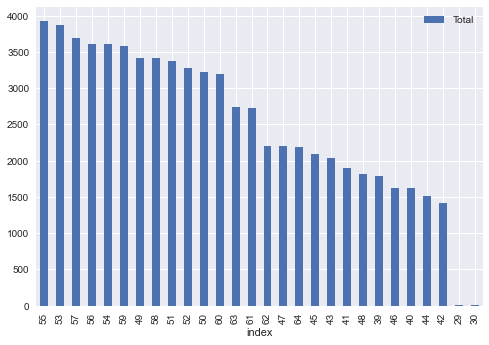

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df=pd.read_csv("medical_examination.csv")
df.isnull().sum(axis=0)
#just checking that thea data is cleaned
#...... its so clean
#making age in years instade of Days
df['age']=(df['age']/365).astype(int)

#df['sex'].value_counts()
#with sex Col i suppose that 1=Male , 2=Female
df['sex'].replace({1:'Male',2:'Female',3:'Unknown'},inplace=True)
age_chart=df['age'].value_counts().reset_index(name='Total')
age_chart.plot(kind='bar',x='index',y='Total',grid='seaborn')


In [128]:
# Add 'overweight' column
df['overweight'] = np.where((df["weight"]/((df["height"]/100)**2))  >25,1,0,)


In [129]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)


In [130]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from
    # 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    vars = sorted(["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

    df_cat = pd.melt(df,id_vars=["cardio"],value_vars=vars,)

    # Group and reformat the data to split it by 'cardio'. Show the counts of
    # each feature. You will have to rename one of the columns for the catplot
    # to work correctly.
    df_cat = df_cat.value_counts().reset_index(name="total")

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(
        data=df_cat,
        x="variable",
        y="total",
        hue="value",
        col="cardio",
        kind="bar",
        order=vars,
    )
    fig.set_ylabels("total")
    fig.set_xlabels("variable")
    

    #Do not modify the next two lines
    fig.savefig("catplot.png") # Don't save to file
    return 

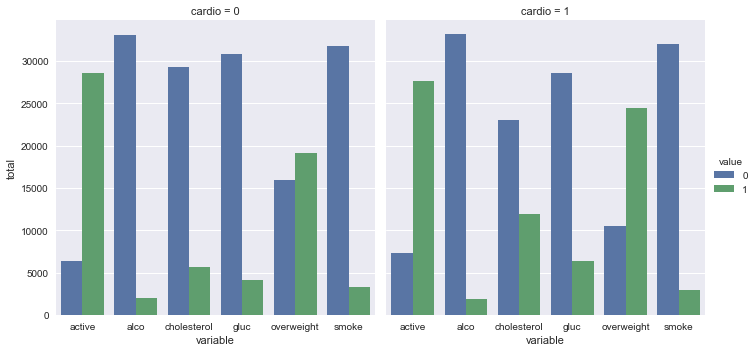

In [131]:
draw_cat_plot()

In [132]:
df_heat = df.loc[(df["ap_lo"] <= df["ap_hi"])& (df["height"] >= df["height"].quantile(0.025))
        & (df["height"] <= df["height"].quantile(0.975))
        & (df["weight"] >= df["weight"].quantile(0.025))
        & (df["weight"] <= df["weight"].quantile(0.975))]

In [133]:
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,Female,168,62.0,110,80,0,0,0,0,1,0,0
1,1,55,Male,156,85.0,140,90,1,0,0,0,1,1,1
2,2,51,Male,165,64.0,130,70,1,0,0,0,0,1,0
3,3,48,Female,169,82.0,150,100,0,0,0,0,1,1,1
4,4,47,Male,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,Male,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,57,Male,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,52,Female,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,61,Male,163,72.0,135,80,0,1,0,0,0,1,1


In [134]:
values = sorted(["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
df_cat=pd.melt(df,id_vars=['cardio'],value_vars=values)
df_cat=df_cat.value_counts().reset_index(name='Values_Count')


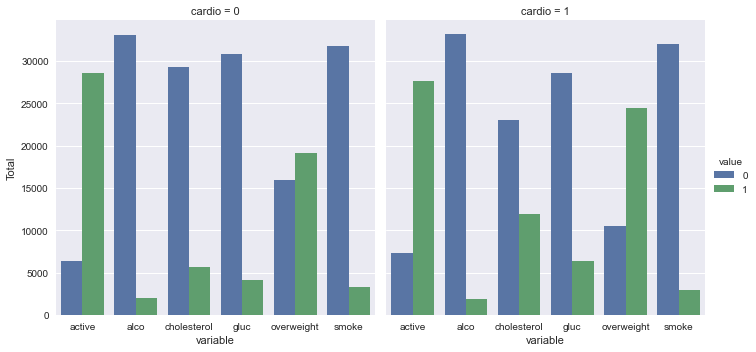

In [135]:
fig = sns.catplot(data=df_cat,x="variable",y="Values_Count",hue="value",col="cardio",kind="bar",order=values,)
fig.set_ylabels("Total")
fig.set_xlabels("variable")
fig.savefig("cardio.png")

<AxesSubplot:title={'center':'Men and women'}, ylabel='Total'>

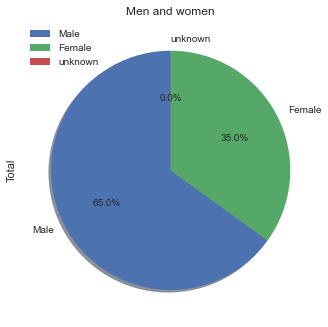

In [136]:
#chart for 'sex' Col
from matplotlib.pyplot import axes

sex_chart=df['sex'].value_counts().reset_index(name='Total')#
sex_chart.rename(columns={"index":'sex'})
sex_chart.plot(kind='pie',x='sex',y="Total",labels=['Male','Female','unknown'],title="Men and women",shadow=True, startangle=90,autopct='%1.1f%%',frame=False)



In [137]:
df_cat

,cardio,variable,value,Values_Count
0,1,alco,0,33156
1,0,alco,0,33080
2,1,smoke,0,32050
3,0,smoke,0,31781
4,0,gluc,0,30894
5,0,cholesterol,0,29330
6,0,active,1,28643
7,1,gluc,0,28585
8,1,active,1,27618
9,1,overweight,1,24440


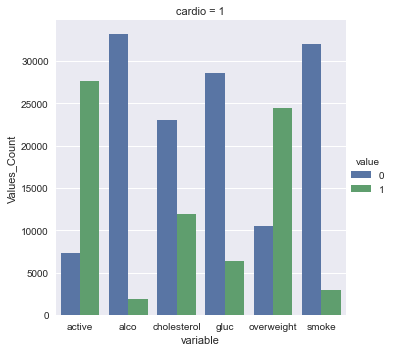

In [138]:
sns.catplot(data=(df_cat[df_cat['cardio']==1]),x='variable',y='Values_Count',kind='bar',order=values,hue='value',col='cardio')

In [139]:
df_heat = df.loc[(df["ap_lo"] <= df["ap_hi"])
        & (df["height"] >= df["height"].quantile(0.025))
        & (df["height"] <= df["height"].quantile(0.975))
        & (df["weight"] >= df["weight"].quantile(0.025))
        & (df["weight"] <= df["weight"].quantile(0.975))]

In [140]:
corr=df_heat.corr()


In [141]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


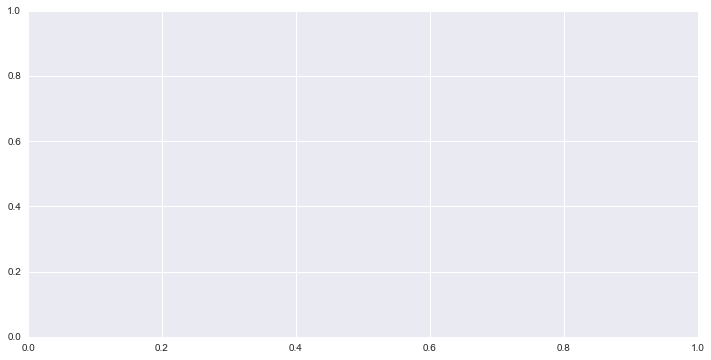

In [147]:
fig ,ax= plt.subplots(figsize=(12, 6))

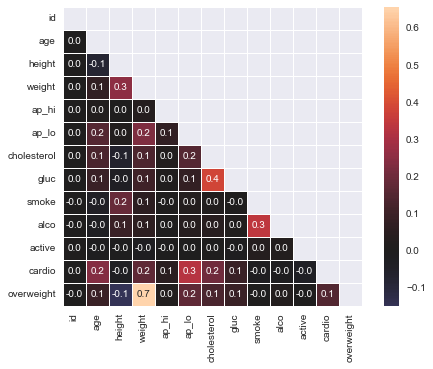

In [143]:
ax = sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', center=0,square=True,linewidths=.5)
